In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [70]:
# load models
model= tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded succesfully')

model loaded succesfully


In [86]:
path= './test_images/N13.jpg'
image= load_img(path)
image= np.array(image,dtype=np.uint8)
image1= load_img(path,target_size=(224,224))
image_arr_224= img_to_array(image1)/225.0



In [87]:
# size of the original image
h,w,d= image.shape
print('Height of the image=',h)
print('width of the image=',w)

Height of the image= 234
width of the image= 334


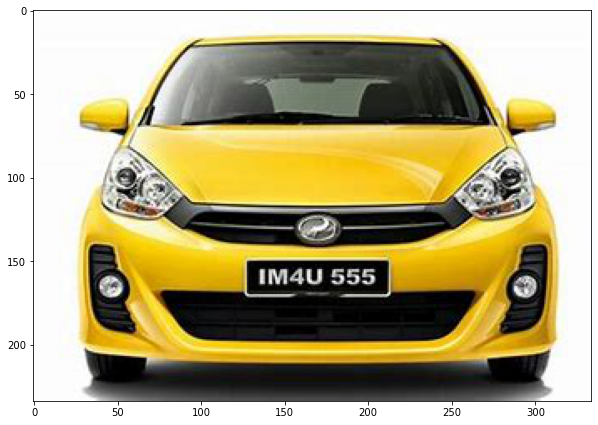

In [88]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [89]:
image_arr_224.shape

(224, 224, 3)

In [90]:
test_arr= image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [91]:
# make prediction
coords= model.predict(test_arr)
coords

1/1 [==============================] - 0s 477ms/step


array([[0., 1., 1., 1.]], dtype=float32)

In [92]:
# denormalize the values
denorm= np.array([w,w,h,h])
coords = coords*denorm
coords

array([[  0., 334., 234., 234.]])

In [93]:
coords= coords.astype(np.int32)
coords

array([[  0, 334, 234, 234]])

(125, 145) (220, 170)


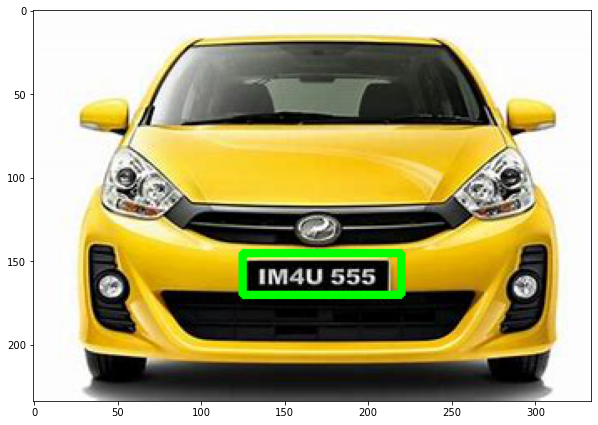

In [94]:
# draw bounding on the top of the images
xmin, xmax, ymin, ymax= coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [84]:
path= './test_images/N11.jpg'
def object_detection(path):
    # read image
    image= load_img(path)
    image= np.array(image,dtype=np.uint8)
    image1= load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224= img_to_array(image1)/225.0
    h,w,d= image.shape
    test_arr= image_arr_224.reshape(1,224,224,3)
    # make prediction
    coords= model.predict(test_arr)
    # denormalization
    denorm= np.array([w,w,h,h])
    coords = coords*denorm
    coords= coords.astype(np.int32)
    # drawing the bounding
    xmin, xmax, ymin, ymax= coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image , coords

1/1 [==============================] - 0s 169ms/step
(100, 100) (200, 170)


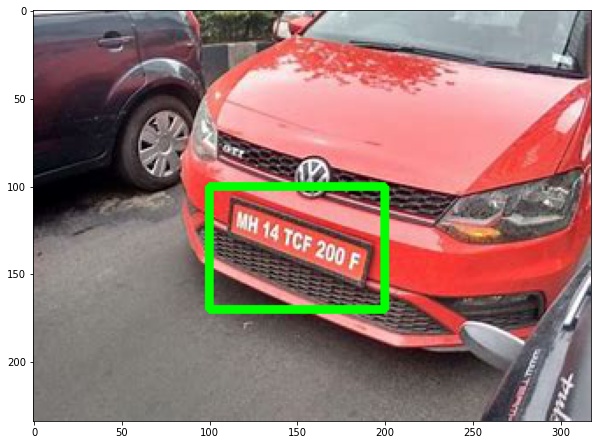

In [85]:
path= './test_images/N11.jpg'
image, coords= object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()